In [9]:
import csv
import numpy as np

def read_csv_file(file_path):
    data = []
    with open(file_path, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            data.append(row)
    return data

def process_data_with_keys(data, subject_names):
    subjects_data = {}
    for i, subject_name in enumerate(subject_names):
        subjects_data[subject_name] = np.array(data[i])
    return subjects_data


file_path = 'studentData.csv'
csv_data = read_csv_file(file_path)

num_students = 0
# Extract subject names
subject_names = csv_data[0][1:]
# Extract students' data
students_data = {}
for row in csv_data[1:]:
    subject_scores = []
    if row[0] != '':
        num_students +=1
        for col in row[1:]:
            if col == '':
                subject_scores.append(10)
            else:
                subject_scores.append(int(col))
        students_data[row[0]] = subject_scores

# Convert dictionary to numpy array
students_array = np.array(list(students_data.values()))

# Transpose the data
transposed_data = students_array.T

# Process the data with keys
subjects_data = process_data_with_keys(transposed_data, subject_names)

# Function to count clashes between two subjects
def count_clashes(subject1_data, subject2_data):
    clashes = np.sum((subject1_data <= 7) & (subject2_data <= 7))
    non_selected = np.sum((subject1_data == 10) & (subject2_data == 10))
    return clashes, non_selected

# Function to report clashes between a subject and all other subjects
def report_clashes_for_subject(subject_name, subjects_data):
    clashes_report = {}
    subject_data = subjects_data[subject_name]
    for other_subject_name, other_subject_data in subjects_data.items():
        if other_subject_name != subject_name:
            clashes, non_selected = count_clashes(subject_data, other_subject_data)
            if clashes > 0 or non_selected > 0:
                clashes_report[other_subject_name] = (clashes, non_selected)
    return clashes_report

# Function to pair subjects together with the least amount of clashes
def pair_subjects_with_least_clashes(subjects_data):
    min_clashes = float('inf')
    min_non_selected = float('inf')
    best_pair = None
    for subject_name, subject_data in subjects_data.items():
        clashes_report = report_clashes_for_subject(subject_name, subjects_data)
        for other_subject_name, (clashes, non_selected) in clashes_report.items():
            if clashes < min_clashes or (clashes == min_clashes and non_selected < min_non_selected):
                min_clashes = clashes
                min_non_selected = non_selected
                best_pair = (subject_name, other_subject_name)
    return best_pair, min_clashes, min_non_selected

# Function to create subject blocks
def create_subject_blocks(subjects_data):
    blocks = []
    remaining_subjects = list(subjects_data.keys())
    while remaining_subjects:
        best_pair, min_clashes, min_non_selected = pair_subjects_with_least_clashes({k: subjects_data[k] for k in remaining_subjects})
        blocks.append((best_pair, min_clashes, min_non_selected))
        remaining_subjects.remove(best_pair[0])
        remaining_subjects.remove(best_pair[1])
    return blocks

# Create subject blocks
subject_blocks = create_subject_blocks(subjects_data)

# Display subject blocks with clashes and non-selected count
print("Subject Blocks:")
total_success = 0
total_clash = 0
total_non_selected = 0
for i, (block, clashes, non_selected_count) in enumerate(subject_blocks, 1):
    success = num_students - clashes - non_selected_count
    subject1, subject2 = block
    total_success += success / num_students * 100
    total_clash += clashes / num_students * 100
    total_non_selected += non_selected_count / num_students * 100
#     print(f"Block {i}:\n{subject1} & {subject2}, Success: {success} {success / num_students * 100:.2f}%, Clashes: {clashes} {clashes / num_students * 100:.2f}%, Non-selected count: {non_selected_count} {non_selected_count / num_students * 100:.2f}% \n")

# print("Average Success: ", round(total_success / len(subject_blocks), 2), "%")
# print("Average Clash: ", round(total_clash / len(subject_blocks), 2), "%")
# print("Average Non-selected: ", round(total_non_selected / len(subject_blocks), 2), "%")

import pandas as pd

# Display subject blocks with clashes and non-selected count as a table
block_data = []
for i, (block, clashes, non_selected_count) in enumerate(subject_blocks, 1):
    success = num_students - clashes - non_selected_count
    subject1, subject2 = block
    block_data.append([f"Block {i}", f"{subject1} & {subject2}", success, f"{success / num_students * 100:.2f}%", clashes, f"{clashes / num_students * 100:.2f}%", non_selected_count, f"{non_selected_count / num_students * 100:.2f}%"])

# Create DataFrame to display as table
columns = ["Block", "Subjects", "Success", "Success Rate", "Clashes", "Clash Rate", "Non-selected Count", "Non-selected Rate"]
blocks_df = pd.DataFrame(block_data, columns=columns)

print(blocks_df)

# Calculate averages
average_success = round(total_success / len(subject_blocks), 2)
average_clash = round(total_clash / len(subject_blocks), 2)
average_non_selected = round(total_non_selected / len(subject_blocks), 2)

print("Average Success: ", average_success, "%")
print("Average Clash: ", average_clash, "%")
print("Average Non-selected: ", average_non_selected, "%")

Subject Blocks:
     Block             Subjects  Success Success Rate  Clashes Clash Rate  \
0  Block 1      Biology & Music       13       92.86%        0      0.00%   
1  Block 2          ICT & Drama        9       64.29%        0      0.00%   
2  Block 3  Business & Mandarin        8       57.14%        0      0.00%   
3  Block 4      Chemistry & Art       12       85.71%        1      7.14%   
4  Block 5              GP & PE        9       64.29%        2     14.29%   
5  Block 6         Physics & DT        5       35.71%        8     57.14%   

   Non-selected Count Non-selected Rate  
0                   1             7.14%  
1                   5            35.71%  
2                   6            42.86%  
3                   1             7.14%  
4                   3            21.43%  
5                   1             7.14%  
Average Success:  66.67 %
Average Clash:  13.1 %
Average Non-selected:  20.24 %


In [11]:
import csv
import numpy as np
import pandas as pd

def read_csv_file(file_path):
    data = []
    with open(file_path, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            data.append(row)
    return data

def process_data_with_keys(data, subject_names):
    subjects_data = {}
    for i, subject_name in enumerate(subject_names):
        subjects_data[subject_name] = np.array(data[i])
    return subjects_data

file_path = 'studentData.csv'
csv_data = read_csv_file(file_path)

num_students = 0
# Extract subject names
subject_names = csv_data[0][1:]
# Extract students' data
students_data = {}
for row in csv_data[1:]:
    subject_scores = []
    if row[0] != '':
        num_students += 1
        for col in row[1:]:
            if col == '':
                subject_scores.append(10)
            else:
                subject_scores.append(int(col))
        students_data[row[0]] = subject_scores

# Convert dictionary to numpy array
students_array = np.array(list(students_data.values()))

# Transpose the data
transposed_data = students_array.T

# Process the data with keys
subjects_data = process_data_with_keys(transposed_data, subject_names)

# Function to count clashes between two subjects
def count_clashes(subject1_data, subject2_data):
    clashes = np.sum((subject1_data <= 7) & (subject2_data <= 7))
    non_selected = np.sum((subject1_data == 10) & (subject2_data == 10))
    return clashes, non_selected

# Function to report clashes between a subject and all other subjects
def report_clashes_for_subject(subject_name, subjects_data):
    clashes_report = {}
    subject_data = subjects_data[subject_name]
    for other_subject_name, other_subject_data in subjects_data.items():
        if other_subject_name != subject_name:
            clashes, non_selected = count_clashes(subject_data, other_subject_data)
            if clashes > 0 or non_selected > 0:
                clashes_report[other_subject_name] = (clashes, non_selected)
    return clashes_report

# Function to pair subjects together with the most students to the least students
def pair_subjects_with_student_counts(subjects_data):
    subject_student_counts = {subject: np.sum(subject_data != 10) for subject, subject_data in subjects_data.items()}
    sorted_subjects = sorted(subject_student_counts.items(), key=lambda x: x[1], reverse=True)
    most_students_subject = sorted_subjects[0][0]
    least_students_subject = sorted_subjects[-1][0]
    return most_students_subject, least_students_subject

def create_subject_blocks(subjects_data, desired_blocks):
    blocks = []
    remaining_subjects = list(subjects_data.keys())
    total_subjects = len(remaining_subjects)
    # Determine the actual number of blocks to create based on the number of subjects
    actual_blocks = min(desired_blocks, total_subjects // 2 + total_subjects % 2)
    
    # Calculate how to distribute subjects across the actual number of blocks
    average_subjects_per_block = total_subjects / actual_blocks
    full_pairs_blocks = int(total_subjects // 2)  # Maximum possible full pair blocks
    subjects_needed_for_triples = total_subjects % 2  # Determine if an odd subject remains
    
    # Adjust calculation if we need triple blocks based on remaining subjects and desired blocks
    if subjects_needed_for_triples > 0 and actual_blocks < full_pairs_blocks + 1:
        # If we have an odd subject but not enough blocks to allocate it as a single triple, adjust
        triple_blocks = actual_blocks - full_pairs_blocks
    else:
        # Evenly distribute triples if needed or if exact division is not possible
        triple_blocks = round((actual_blocks * average_subjects_per_block - total_subjects) / 3)
    
    pairs_blocks = actual_blocks - triple_blocks  # The rest will be pair blocks
    
    # Create pair blocks first
    for _ in range(pairs_blocks):
        if len(remaining_subjects) < 2: break  # Safety check
        most_students_subject, least_students_subject = pair_subjects_with_student_counts({k: subjects_data[k] for k in remaining_subjects})
        blocks.append(((most_students_subject, least_students_subject), *count_clashes(subjects_data[most_students_subject], subjects_data[least_students_subject])))
        remaining_subjects.remove(most_students_subject)
        remaining_subjects.remove(least_students_subject)
    
    # Create triple blocks with the remaining subjects
    while remaining_subjects:
        if len(remaining_subjects) >= 3:
            sorted_subjects = sorted(remaining_subjects, key=lambda x: np.sum(subjects_data[x] != 10), reverse=True)[:3]
        else:
            # Use remaining subjects if less than 3
            sorted_subjects = remaining_subjects
        
        # Simplified clash calculation for demonstration
        blocks.append((tuple(sorted_subjects), 0, 0))
        for subject in sorted_subjects:
            remaining_subjects.remove(subject)
    
    return blocks

# Adjust this to how many blocks you want
desired_blocks = 4 #

# Create subject blocks with the new parameter
subject_blocks = create_subject_blocks(subjects_data, desired_blocks)


# Display subject blocks with clashes and non-selected count as a table
block_data = []
for i, (block, clashes, non_selected_count) in enumerate(subject_blocks, 1):
    success = num_students - clashes - non_selected_count
    # Handle both pairs and triplets dynamically
    print(block)
    if len(block) == 2:
        subject1, subject2 = block
        num_students_subject1 = np.sum(subjects_data[subject1] != 10)
        num_students_subject2 = np.sum(subjects_data[subject2] != 10)
        subjects_str = f"{subject1}({num_students_subject1}) & {subject2}({num_students_subject2})"
    elif len(block) == 3:
        subject1, subject2, subject3 = block
        num_students_subject1 = np.sum(subjects_data[subject1] != 10)
        num_students_subject2 = np.sum(subjects_data[subject2] != 10)
        num_students_subject3 = np.sum(subjects_data[subject3] != 10)
        subjects_str = f"{subject1}({num_students_subject1}), {subject2}({num_students_subject2}) & {subject3}({num_students_subject3})"
    else:
        subjects_str = "Error in block configuration"

    block_data.append([f"Block {i}", subjects_str, success, f"{success / num_students * 100:.2f}%", clashes, f"{clashes / num_students * 100:.2f}%", 
                       non_selected_count, f"{non_selected_count / num_students * 100:.2f}%"])

# Create DataFrame to display as table
columns = ["Block", "Subjects", "S", "S%", "C", "C%", "NS", "NS%"]
blocks_df = pd.DataFrame(block_data, columns=columns)

print(blocks_df)


('Chemistry', 'Mandarin')
('Physics', 'Art')
('Biology', 'Drama')
('DT', 'Music')
('GP', 'Business', 'ICT')
('PE',)
     Block                      Subjects   S       S%  C      C%  NS     NS%
0  Block 1   Chemistry(11) & Mandarin(2)  11   78.57%  1   7.14%   2  14.29%
1  Block 2          Physics(11) & Art(3)  12   85.71%  1   7.14%   1   7.14%
2  Block 3        Biology(10) & Drama(3)   9   64.29%  2  14.29%   3  21.43%
3  Block 4             DT(10) & Music(3)  11   78.57%  1   7.14%   2  14.29%
4  Block 5   GP(7), Business(6) & ICT(6)  14  100.00%  0   0.00%   0   0.00%
5  Block 6  Error in block configuration  14  100.00%  0   0.00%   0   0.00%


In [16]:
import csv
import numpy as np
import pandas as pd

def read_csv_file(file_path):
    data = []
    with open(file_path, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            data.append(row)
    return data

def process_data_with_keys(data, subject_names):
    subjects_data = {}
    for i, subject_name in enumerate(subject_names):
        subjects_data[subject_name] = np.array(data[i])
    return subjects_data

file_path = 'studentData.csv'
csv_data = read_csv_file(file_path)

num_students = 0
# Extract subject names
subject_names = csv_data[0][1:]
# Extract students' data
students_data = {}
for row in csv_data[1:]:
    subject_scores = []
    if row[0] != '':
        num_students += 1
        for col in row[1:]:
            if col == '':
                subject_scores.append(10)
            else:
                subject_scores.append(int(col))
        students_data[row[0]] = subject_scores

# Convert dictionary to numpy array
students_array = np.array(list(students_data.values()))

# Transpose the data
transposed_data = students_array.T

# Process the data with keys
subjects_data = process_data_with_keys(transposed_data, subject_names)

# Function to count clashes between two subjects
def count_clashes(subject1_data, subject2_data):
    clashes = np.sum((subject1_data <= 7) & (subject2_data <= 7))
    non_selected = np.sum((subject1_data == 10) & (subject2_data == 10))
    return clashes, non_selected

# Function to report clashes between a subject and all other subjects
def report_clashes_for_subject(subject_name, subjects_data):
    clashes_report = {}
    subject_data = subjects_data[subject_name]
    for other_subject_name, other_subject_data in subjects_data.items():
        if other_subject_name != subject_name:
            clashes, non_selected = count_clashes(subject_data, other_subject_data)
            if clashes > 0 or non_selected > 0:
                clashes_report[other_subject_name] = (clashes, non_selected)
    return clashes_report

# Function to pair subjects together with the most students to the least students, considering clash count
def pair_subjects_with_student_counts(subjects_data):
    subject_clash_counts = {}
    for subject, subject_data in subjects_data.items():
        clash_count = sum(count_clashes(subject_data, other_subject_data)[0] for other_subject_data in subjects_data.values() if other_subject_data is not subject_data)
        student_count = np.sum(subject_data != 10)
        subject_clash_counts[subject] = (student_count, clash_count)
    sorted_subjects = sorted(subject_clash_counts.items(), key=lambda x: (x[1][1], -x[1][0]))  # Sort by clash count then by student count
    most_students_subject = sorted_subjects[0][0]
    least_students_subject = sorted_subjects[-1][0]
    return most_students_subject, least_students_subject

def create_subject_blocks(subjects_data, desired_blocks):
    blocks = []
    remaining_subjects = list(subjects_data.keys())
    total_subjects = len(remaining_subjects)
    desired_blocks -= 4    
    # Determine the actual number of blocks to create based on the number of subjects
    actual_blocks = min(desired_blocks, total_subjects // 2 + total_subjects % 2)
    
    # Calculate how to distribute subjects across the actual number of blocks
    average_subjects_per_block = total_subjects / actual_blocks
    full_pairs_blocks = int(total_subjects // 2)  # Maximum possible full pair blocks
    subjects_needed_for_triples = total_subjects % 2  # Determine if an odd subject remains
    
    # Adjust calculation if we need triple blocks based on remaining subjects and desired blocks
    if subjects_needed_for_triples > 0 and actual_blocks < full_pairs_blocks + 1:
        # If we have an odd subject but not enough blocks to allocate it as a single triple, adjust
        triple_blocks = actual_blocks - full_pairs_blocks
    else:
        # Evenly distribute triples if needed or if exact division is not possible
        triple_blocks = round((actual_blocks * average_subjects_per_block - total_subjects) / 3)
    
    pairs_blocks = actual_blocks - triple_blocks  # The rest will be pair blocks
    
    # Create pair blocks first
    for _ in range(pairs_blocks):
        if len(remaining_subjects) < 2: break  # Safety check
        most_students_subject, least_students_subject = pair_subjects_with_student_counts({k: subjects_data[k] for k in remaining_subjects})
        blocks.append(((most_students_subject, least_students_subject), *count_clashes(subjects_data[most_students_subject], subjects_data[least_students_subject])))
        remaining_subjects.remove(most_students_subject)
        remaining_subjects.remove(least_students_subject)
    
    # Create triple blocks with the remaining subjects
    while remaining_subjects:
        if len(remaining_subjects) >= 3:
            sorted_subjects = sorted(remaining_subjects, key=lambda x: np.sum(subjects_data[x] != 10), reverse=True)[:3]
        else:
            # Use remaining subjects if less than 3
            sorted_subjects = remaining_subjects
        
        # Simplified clash calculation for demonstration
        blocks.append((tuple(sorted_subjects), 0, 0))
        for subject in sorted_subjects:
            remaining_subjects.remove(subject)
    
    return blocks

# Adjust this to how many blocks you want
desired_blocks = 6 #

# Create subject blocks with the new parameter
subject_blocks = create_subject_blocks(subjects_data, desired_blocks)


# Display subject blocks with clashes and non-selected count as a table
block_data = []
for i, (block, clashes, non_selected_count) in enumerate(subject_blocks, 1):
    success = num_students - clashes - non_selected_count
    # Handle both pairs and triplets dynamically
    print(block)
    if len(block) == 2:
        subject1, subject2 = block
        num_students_subject1 = np.sum(subjects_data[subject1] != 10)
        num_students_subject2 = np.sum(subjects_data[subject2] != 10)
        subjects_str = f"{subject1}({num_students_subject1}) & {subject2}({num_students_subject2})"
    elif len(block) == 3:
        subject1, subject2, subject3 = block
        num_students_subject1 = np.sum(subjects_data[subject1] != 10)
        num_students_subject2 = np.sum(subjects_data[subject2] != 10)
        num_students_subject3 = np.sum(subjects_data[subject3] != 10)
        subjects_str = f"{subject1}({num_students_subject1}), {subject2}({num_students_subject2}) & {subject3}({num_students_subject3})"
    else:
        subjects_str = "Error in block configuration"

    block_data.append([f"Block {i}", subjects_str, success, f"{success / num_students * 100:.2f}%", clashes, f"{clashes / num_students * 100:.2f}%", 
                       non_selected_count, f"{non_selected_count / num_students * 100:.2f}%"])

# Create DataFrame to display as table
columns = ["Block", "Subjects", "S", "S%", "C", "C%", "NS", "NS%"]
blocks_df = pd.DataFrame(block_data, columns=columns)

print(blocks_df)


('Mandarin', 'Physics')
('Music', 'Chemistry')
('Biology', 'DT', 'GP')
('Business', 'ICT', 'PE')
('Drama', 'Art')
('Art',)
     Block                      Subjects   S       S%  C      C%  NS     NS%
0  Block 1     Mandarin(2) & Physics(11)   9   64.29%  2  14.29%   3  21.43%
1  Block 2      Music(3) & Chemistry(11)  10   71.43%  2  14.29%   2  14.29%
2  Block 3   Biology(10), DT(10) & GP(7)  14  100.00%  0   0.00%   0   0.00%
3  Block 4   Business(6), ICT(6) & PE(6)  14  100.00%  0   0.00%   0   0.00%
4  Block 5             Drama(3) & Art(3)  14  100.00%  0   0.00%   0   0.00%
5  Block 6  Error in block configuration  14  100.00%  0   0.00%   0   0.00%


In [161]:
import csv
import numpy as np
import pandas as pd

def read_csv_file(file_path):
    data = []
    with open(file_path, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            data.append(row)
    return data

def process_data_with_keys(data, subject_names, teacher_names):
    subjects_data = {}
    for i, subject_name in enumerate(subject_names):
        subjects_data[subject_name] = {'scores': np.array(data[i]), 'teacher': teacher_names[i]}
    return subjects_data

file_path = 'studentData.csv'
csv_data = read_csv_file(file_path)

num_students = 0
# Extract subject names and teacher names
subject_names = csv_data[0][1:]
teacher_names = csv_data[1][1:]
# Extract students' data
students_data = {}
for row in csv_data[2:]:
    subject_scores = []
    if row[0] != '':
        num_students += 1
        for col in row[1:]:
            if col == '':
                subject_scores.append(10)
            else:
                subject_scores.append(int(col))
        students_data[row[0]] = subject_scores

# Convert dictionary to numpy array
students_array = np.array(list(students_data.values()))

# Transpose the data
transposed_data = students_array.T

# Process the data with keys
subjects_data = process_data_with_keys(transposed_data, subject_names, teacher_names)

# Function to count clashes between two subjects
def count_clashes(subject1_data, subject2_data):
    clashes = np.sum((subject1_data <= 7) & (subject2_data <= 7))
    non_selected = np.sum((subject1_data == 10) & (subject2_data == 10))
    return clashes, non_selected

# Function to pair subjects together with the most students to the least students, considering clash count and teacher
def pair_subjects_with_student_counts(subjects_data):
    subject_clash_counts = {}
    for subject, subject_data in subjects_data.items():
        clash_count = sum(count_clashes(subject_data['scores'], other_subject_data['scores'])[0] for other_subject_data in subjects_data.values() if other_subject_data is not subject_data)
        student_count = np.sum(subject_data['scores'] != 10)
        subject_clash_counts[subject] = (student_count, clash_count, subject_data['teacher'])
    sorted_subjects = sorted(subject_clash_counts.items(), key=lambda x: (x[1][1], -x[1][0]))  # Sort by clash count then by student count
    most_students_subject = sorted_subjects[0][0]
    least_students_subject = sorted_subjects[-1][0]
    return most_students_subject, least_students_subject

def create_subject_blocks(subjects_data, desired_blocks):
    blocks = []
    remaining_subjects = list(subjects_data.keys())
    total_subjects = len(remaining_subjects)
    desired_blocks -= 4    
    # Determine the actual number of blocks to create based on the number of subjects
    actual_blocks = min(desired_blocks, total_subjects // 2 + total_subjects % 2)
    
    # Calculate how to distribute subjects across the actual number of blocks
    average_subjects_per_block = total_subjects / actual_blocks
    full_pairs_blocks = int(total_subjects // 2)  # Maximum possible full pair blocks
    subjects_needed_for_triples = total_subjects % 2  # Determine if an odd subject remains
    
    # Adjust calculation if we need triple blocks based on remaining subjects and desired blocks
    if subjects_needed_for_triples > 0 and actual_blocks < full_pairs_blocks + 1:
        # If we have an odd subject but not enough blocks to allocate it as a single triple, adjust
        triple_blocks = actual_blocks - full_pairs_blocks
    else:
        # Evenly distribute triples if needed or if exact division is not possible
        triple_blocks = round((actual_blocks * average_subjects_per_block - total_subjects) / 3)
    
    pairs_blocks = actual_blocks - triple_blocks  # The rest will be pair blocks
    
    # Create pair blocks first
    for _ in range(pairs_blocks):
        if len(remaining_subjects) < 2: break  # Safety check
        most_students_subject, least_students_subject = pair_subjects_with_student_counts({k: subjects_data[k] for k in remaining_subjects})
        # Check if subjects have the same teacher
        if subjects_data[most_students_subject]['teacher'] != subjects_data[least_students_subject]['teacher']:
            blocks.append(((most_students_subject, least_students_subject), *count_clashes(subjects_data[most_students_subject]['scores'], subjects_data[least_students_subject]['scores'])))
            remaining_subjects.remove(most_students_subject)
            remaining_subjects.remove(least_students_subject)
        else:
            print(f"Error: Cannot find a valid pair for subjects '{most_students_subject}' and '{least_students_subject}' as they have the same teacher.")
            # Reshuffle remaining subjects and try again
            np.random.shuffle(remaining_subjects)
    
    # Create triple blocks with the remaining subjects
    while remaining_subjects:
        if len(remaining_subjects) >= 3:
            # Check if subjects have the same teacher
            if subjects_data[remaining_subjects[0]]['teacher'] == subjects_data[remaining_subjects[1]]['teacher'] == subjects_data[remaining_subjects[2]]['teacher']:
                print(f"Error: Cannot find a valid triple for subjects {remaining_subjects} as they have the same teacher.")
                # Reshuffle remaining subjects and try again
                np.random.shuffle(remaining_subjects)
                continue
            sorted_subjects = sorted(remaining_subjects, key=lambda x: subjects_data[x]['scores'].sum(), reverse=True)[:3]
        else:
            # Use remaining subjects if less than 3
            sorted_subjects = remaining_subjects
        
        # Simplified clash calculation for demonstration
        blocks.append((tuple(sorted_subjects), 0, 0))
        for subject in sorted_subjects:
            remaining_subjects.remove(subject)
    
    return blocks

# Adjust this to how many blocks you want
desired_blocks = 6 #

# Create subject blocks with the new parameter
subject_blocks = create_subject_blocks(subjects_data, desired_blocks)


# Display subject blocks with clashes and non-selected count as a table
block_data = []
for i, (block, clashes, non_selected_count) in enumerate(subject_blocks, 1):
    success = num_students - clashes - non_selected_count
    # Handle both pairs and triplets dynamically
    if len(block) == 2:
        subject1, subject2 = block
        num_students_subject1 = np.sum(subjects_data[subject1]['scores'] != 10)
        num_students_subject2 = np.sum(subjects_data[subject2]['scores'] != 10)
        subjects_str = f"{subject1}({num_students_subject1}) & {subject2}({num_students_subject2})"
    elif len(block) == 3:
        subject1, subject2, subject3 = block
        num_students_subject1 = np.sum(subjects_data[subject1]['scores'] != 10)
        num_students_subject2 = np.sum(subjects_data[subject2]['scores'] != 10)
        num_students_subject3 = np.sum(subjects_data[subject3]['scores'] != 10)
        subjects_str = f"{subject1}({num_students_subject1}), {subject2}({num_students_subject2}) & {subject3}({num_students_subject3})"
    else:
        subjects_str = "Error in block configuration"

    block_data.append([f"Block {i}", subjects_str, success, f"{success / num_students * 100:.2f}%", clashes, f"{clashes / num_students * 100:.2f}%", 
                       non_selected_count, f"{non_selected_count / num_students * 100:.2f}%"])

# Create DataFrame to display as table
columns = ["Block", "Subjects", "S", "S%", "C", "C%", "NS", "NS%"]
blocks_df = pd.DataFrame(block_data, columns=columns)

print(blocks_df)


     Block                           Subjects   S       S%  C      C%  NS  \
0  Block 1           Geography(1) & Malay(10)   9   69.23%  1   7.69%   3   
1  Block 2  Computer Science(2) & Physics(10)   8   61.54%  2  15.38%   3   
2  Block 3   Mandarin(2), Drama(3) & Music(3)  13  100.00%  0   0.00%   0   
3  Block 4        History(3), Art(3) & ICT(6)  13  100.00%  0   0.00%   0   
4  Block 5         GP(6), Business(6) & PE(6)  13  100.00%  0   0.00%   0   
5  Block 6  DT(9), Biology(9) & Chemistry(10)  13  100.00%  0   0.00%   0   

      NS%  
0  23.08%  
1  23.08%  
2   0.00%  
3   0.00%  
4   0.00%  
5   0.00%  


In [32]:
## For self analysis
import numpy as np
import csv
import numpy as np
import pandas as pd

def read_csv_file(file_path):
    data = []
    with open(file_path, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            data.append(row)
    return data

def process_data_with_keys(data, subject_names):
    subjects_data = {}
    for i, subject_name in enumerate(subject_names):
        subjects_data[subject_name] = np.array(data[i])
    return subjects_data

file_path = 'studentData.csv'
csv_data = read_csv_file(file_path)

totalStudents = 0
# Extract subject names
subject_names = csv_data[0][1:]
# Extract students' data
students_data = {}
for row in csv_data[1:]:
    subject_scores = []
    if row[0] != '':
        totalStudents += 1
        for col in row[1:]:
            if col == '':
                subject_scores.append(10)
            else:
                subject_scores.append(int(col))
        students_data[row[0]] = subject_scores

# Function to count clashes between two subjects
def count_clashes(subject1_data, subject2_data):
    clashes = np.sum((subject1_data <= 7) & (subject2_data <= 7))
    non_selected = np.sum((subject1_data == 10) & (subject2_data == 10))
    return clashes, non_selected

# Function to report clashes between a subject and all other subjects
def report_clashes_for_subject(subject_name, subjects_data):
    clashes_report = {}
    subject_data = subjects_data[subject_name]
    for other_subject_name, other_subject_data in subjects_data.items():
        if other_subject_name != subject_name:
            clashes, non_selected = count_clashes(subject_data, other_subject_data)
            if clashes > 0 or non_selected > 0:
                clashes_report[other_subject_name] = (clashes, non_selected)
    return clashes_report

# Generate and print clashes report for each subject
for subject_name, subject_data in subjects_data.items():
    num_students = np.sum(subject_data <= 7)  # Count the number of students for this subject
    clashes_report = report_clashes_for_subject(subject_name, subjects_data)
    if clashes_report:
        print(f"For {subject_name} ({num_students}):")
        for other_subject, (clashes, non_selected) in clashes_report.items():
            num_students_other = np.sum(subjects_data[other_subject] <= 7)  # Count the number of students for the other subject
            print(f"- {clashes} clashed and {non_selected} not-selected with {other_subject} ({num_students_other}). Compatibility: {100-((clashes+non_selected)/totalStudents)*100:.2f}")
    else:
        print(f"No clashes for {subject_name}.")


For Biology (10):
- 8 clashed and 1 not-selected with Chemistry (11). Compatibility: 35.71
- 7 clashed and 0 not-selected with Physics (11). Compatibility: 50.00
- 2 clashed and 0 not-selected with Business (6). Compatibility: 85.71
- 6 clashed and 3 not-selected with GP (7). Compatibility: 35.71
- 4 clashed and 2 not-selected with ICT (6). Compatibility: 57.14
- 2 clashed and 4 not-selected with Mandarin (2). Compatibility: 57.14
- 0 clashed and 1 not-selected with Music (3). Compatibility: 92.86
- 2 clashed and 3 not-selected with Drama (3). Compatibility: 64.29
- 2 clashed and 3 not-selected with Art (3). Compatibility: 64.29
- 8 clashed and 2 not-selected with DT (10). Compatibility: 28.57
- 4 clashed and 2 not-selected with PE (6). Compatibility: 57.14
For Chemistry (11):
- 8 clashed and 1 not-selected with Biology (10). Compatibility: 35.71
- 9 clashed and 1 not-selected with Physics (11). Compatibility: 28.57
- 5 clashed and 2 not-selected with Business (6). Compatibility: 50.00

In [70]:
print(subjects_data)

{'Biology': array([ 6,  6, 10,  4,  2,  1,  3,  3,  2, 10,  1, 10, 10,  4]), 'Chemistry': array([ 3,  2,  1,  3, 10,  3,  2,  2,  4,  2, 10,  4, 10,  3]), 'Physics': array([ 2,  1,  5,  2,  6,  2,  1, 10, 10,  1, 10,  2,  6,  2]), 'Business': array([10, 10,  2, 10, 10, 10, 10,  5,  6,  4, 10,  1,  7, 10]), 'GP': array([ 7, 10,  4, 10,  3,  7, 10,  7,  5, 10,  5, 10, 10, 10]), 'History': array([10, 10, 10, 10,  4,  6, 10,  4, 10, 10, 10, 10, 10, 10]), 'ICT': array([10, 10, 10,  6, 10, 10,  5,  6, 10,  6, 10, 10,  4,  7]), 'Mandarin': array([10, 10, 10,  1,  7, 10, 10, 10, 10, 10, 10, 10, 10, 10]), 'Malay': array([ 1,  5, 10,  5, 10, 10,  7,  1,  1,  5,  2,  5,  3,  5]), 'Music': array([10, 10,  7, 10, 10, 10, 10, 10, 10,  7, 10, 10,  2, 10]), 'Drama': array([10, 10,  6, 10, 10,  5, 10, 10, 10, 10,  6, 10, 10, 10]), 'Art': array([10, 10, 10, 10, 10, 10, 10, 10,  3, 10,  7, 10,  1, 10]), 'DT': array([ 5,  7, 10,  7,  5, 10,  4, 10,  7,  3,  3,  7, 10,  6]), 'PE': array([10, 10, 10, 10,  1

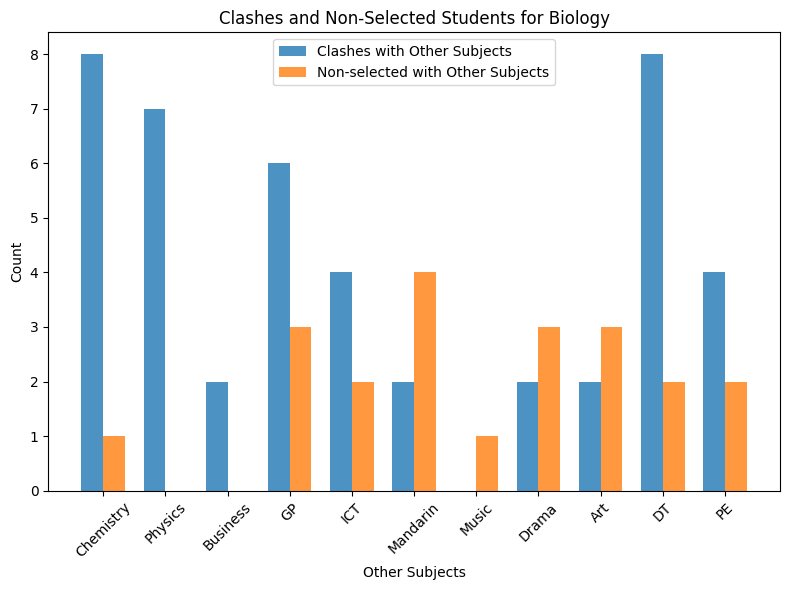

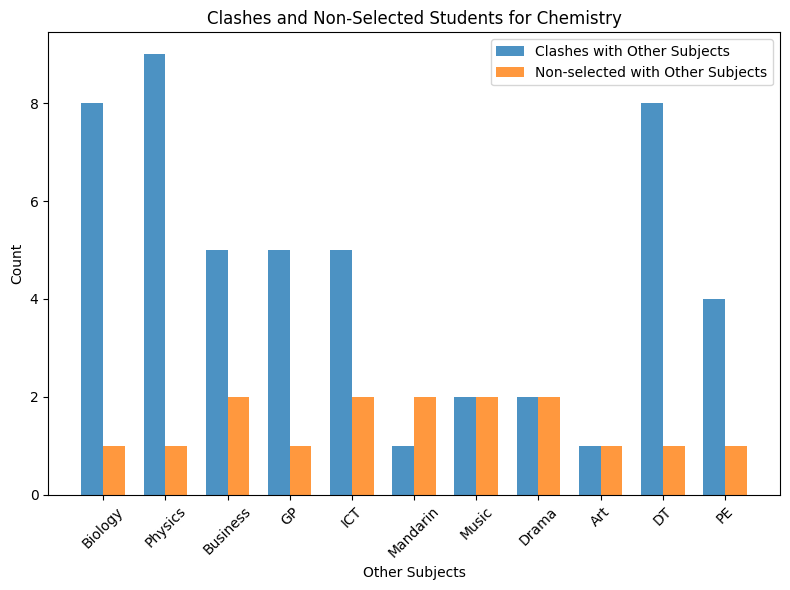

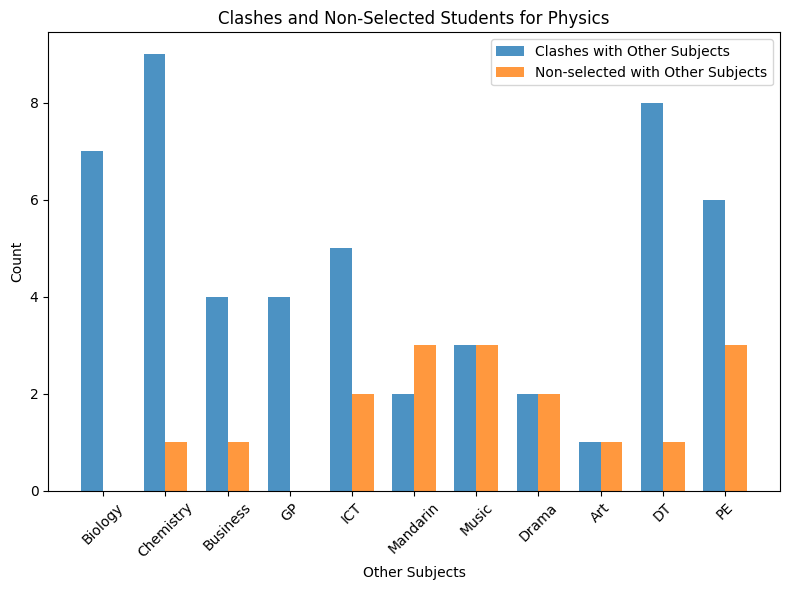

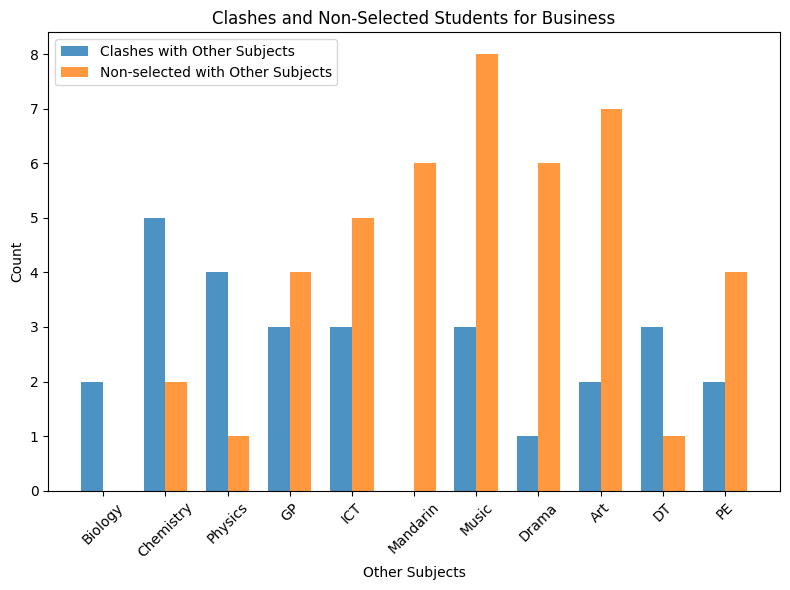

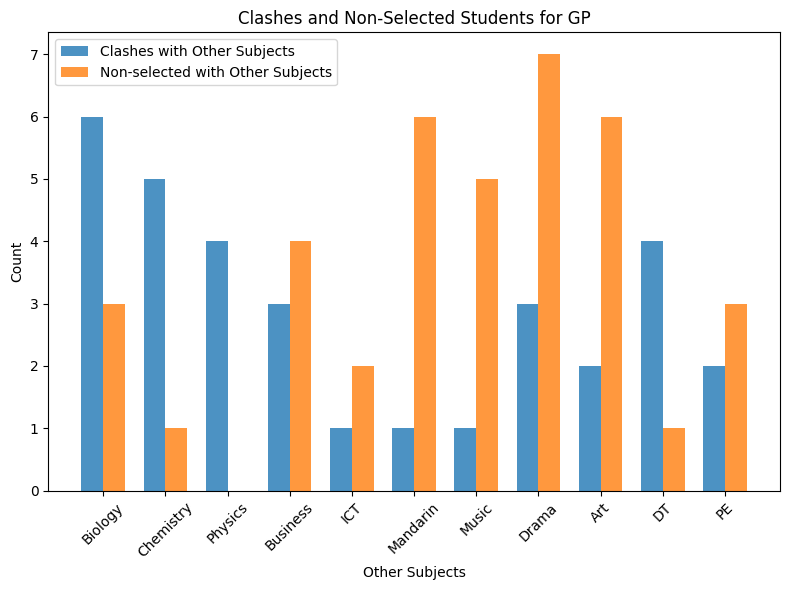

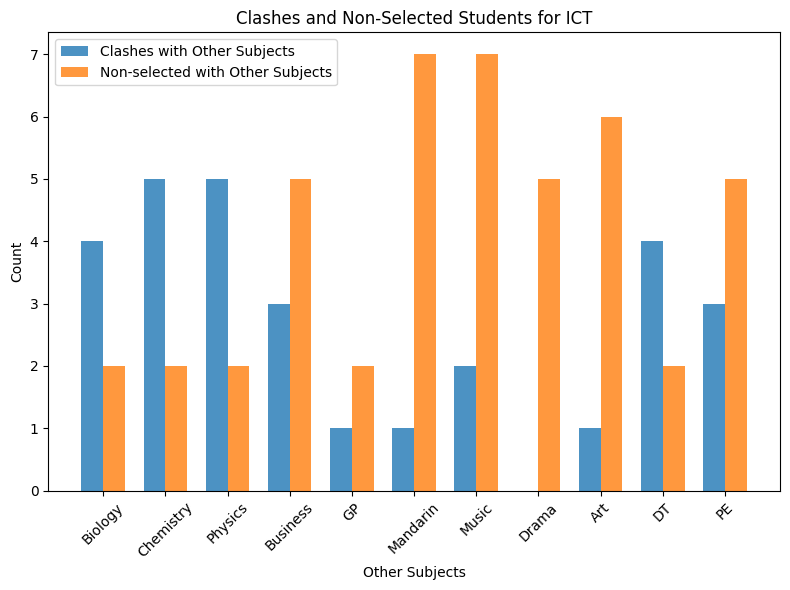

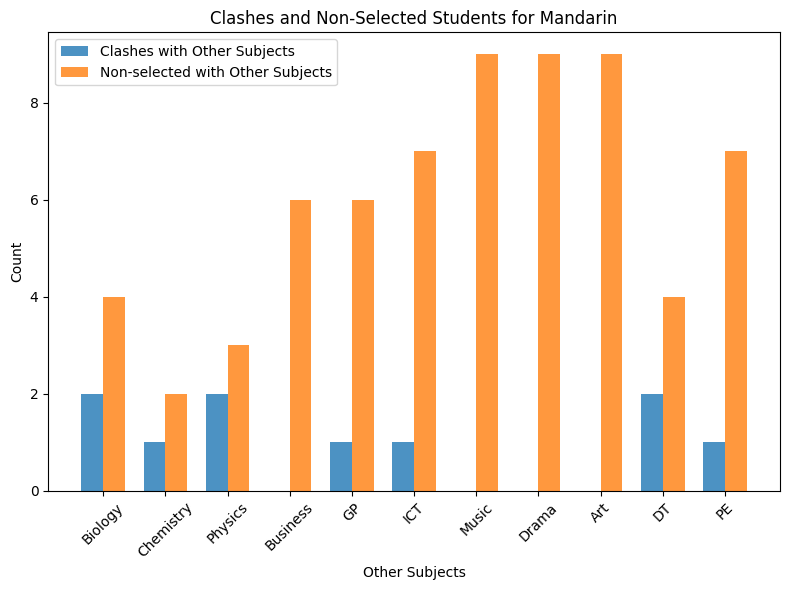

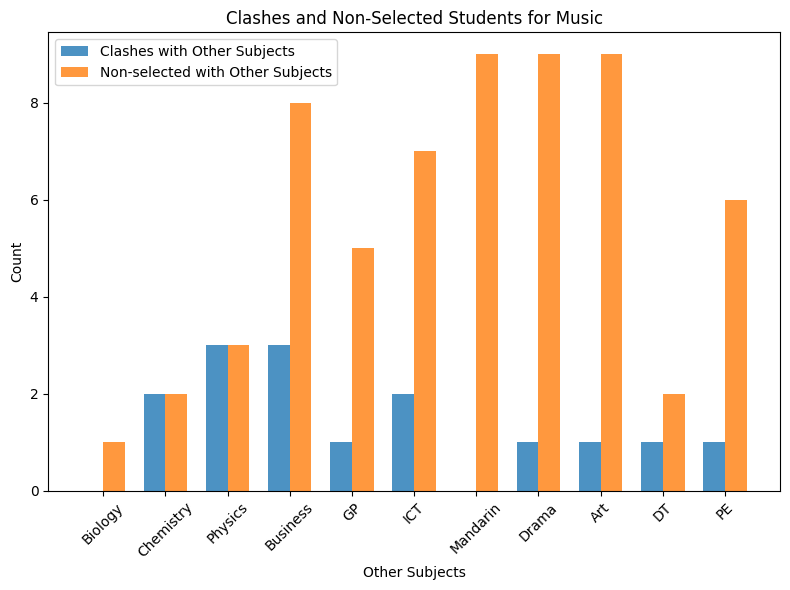

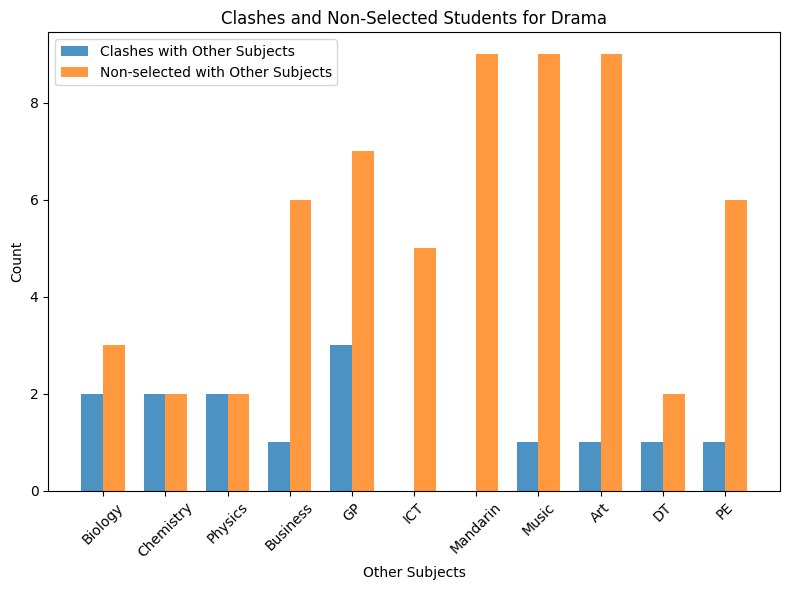

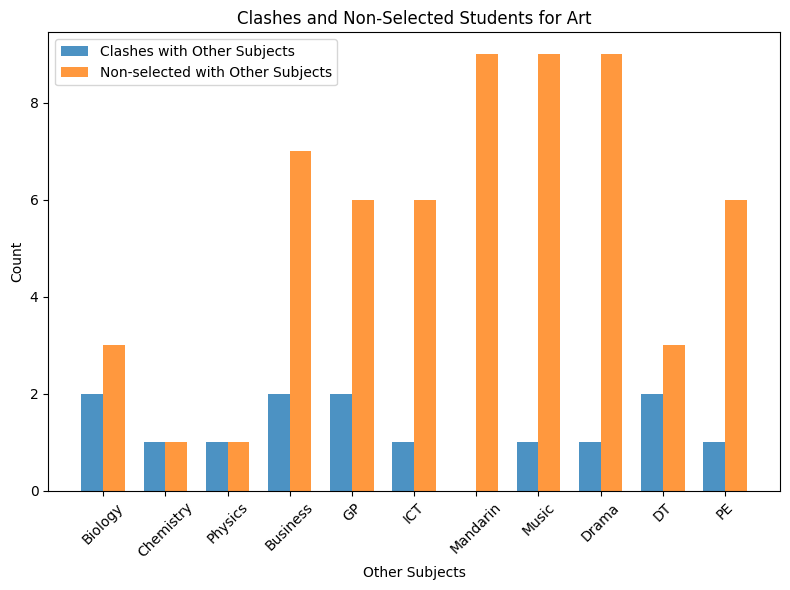

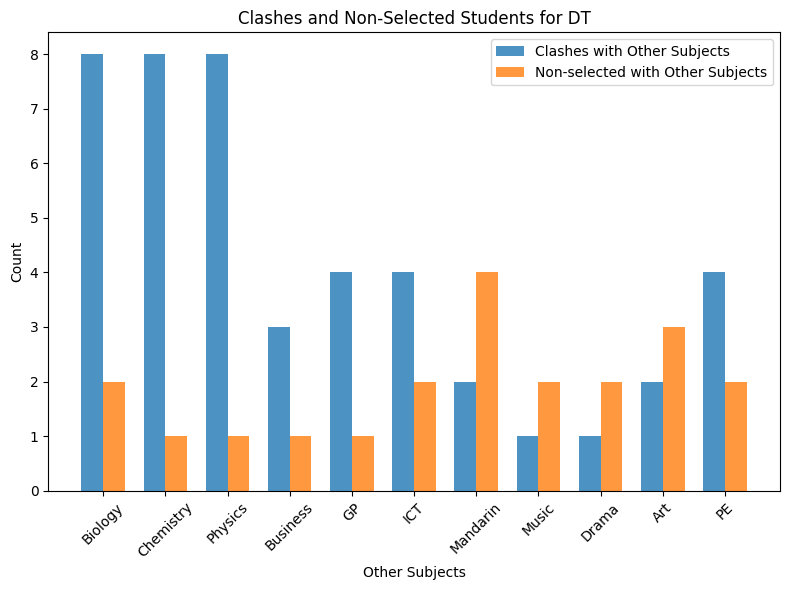

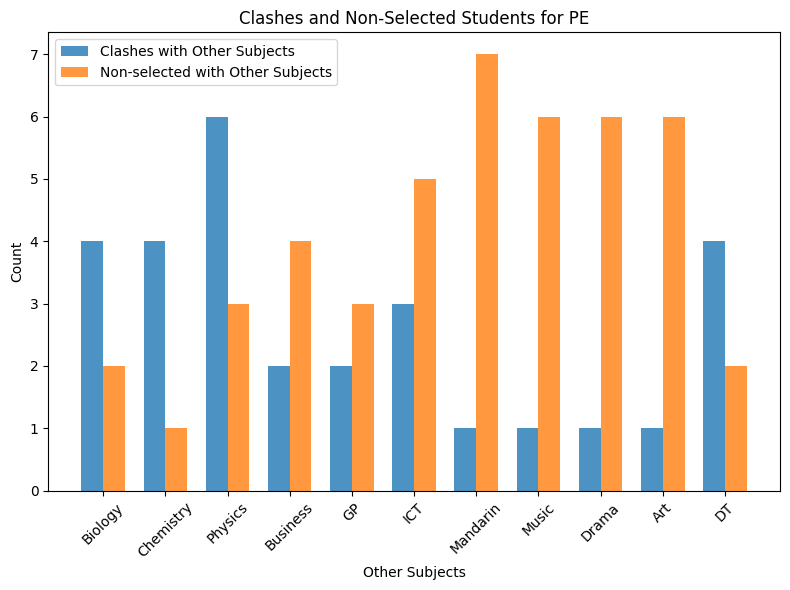

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function to count clashes between two subjects
def count_clashes(subject1_data, subject2_data):
    clashes = np.sum((subject1_data <= 7) & (subject2_data <= 7))
    non_selected = np.sum((subject1_data == 10) & (subject2_data == 10))
    return clashes, non_selected

# Function to report clashes between a subject and all other subjects
def report_clashes_for_subject(subject_name, subjects_data):
    clashes_report = {}
    subject_data = subjects_data[subject_name]
    for other_subject_name, other_subject_data in subjects_data.items():
        if other_subject_name != subject_name:
            clashes, non_selected = count_clashes(subject_data, other_subject_data)
            if clashes > 0 or non_selected > 0:
                clashes_report[other_subject_name] = (clashes, non_selected)
            else:
                # Add zero count for subjects with no clashes or non-selected students
                clashes_report[other_subject_name] = (0, 0)
    return clashes_report

# Generate data for plotting
subject_names = list(subjects_data.keys())
for subject_name in subject_names:
    clashes_data = []
    non_selected_data = []
    subject_data = subjects_data[subject_name]
    for other_subject_name in subject_names:
        if other_subject_name != subject_name:
            clashes, non_selected = count_clashes(subject_data, subjects_data[other_subject_name])
            clashes_data.append(clashes)
            non_selected_data.append(non_selected)

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    index = np.arange(len(clashes_data))
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, clashes_data, bar_width, alpha=opacity, label=f'Clashes with Other Subjects')
    rects2 = plt.bar(index + bar_width, non_selected_data, bar_width, alpha=opacity, label=f'Non-selected with Other Subjects')

    plt.xlabel('Other Subjects')
    plt.ylabel('Count')
    plt.title(f'Clashes and Non-Selected Students for {subject_name}')
    plt.xticks(index + bar_width / 2, [subj_name for subj_name in subject_names if subj_name != subject_name], rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()


Things to do

- Count popular subject
- Check subject with other subject and count with the least clash